(pandas2)=
# Table reshaping and joins

In [1]:
!echo Last updated: `date +'%Y-%m-%d %H:%M:%S'`

Last updated: 2023-10-27 12:55:11


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 35
plt.rcParams['figure.figsize'] = (6, 6)

*****

## Introduction

In the previous chapter (see {ref}`pandas1`), we introduced the `pandas` package, and covered the basic operations with tables using `pandas`, such as importing and exporting, subsetting, renaming columns, sorting, and calculating new columns. In practice, we often need to do more than that. For example, we may need to aggregate, or to reshape, tables into a different form, or to combine numerous tables into one. In this chapter, we cover some of the common table operations which involve modifying table structure or combining multiple tables.

When working with data, it is often necessary to *combine* data from multiple sources, and/or *reshape* data into the right form that a particular function accepts: 

* Combining may simply involve "pasting", or concatenating, two tables one on top of the other, or side-by-side (see {ref}`pandas-concatenation`). 
* In more complex cases, combining involves a table *join*, where the information from two tables is combined according to one or more "key" columns which are common to both tables (see {ref}`pandas-joining-tables`). 
* Moreover, we may need to summarize the values of a table according to a particular grouping, which is known as *aggregation* (see {ref}`pandas-aggregation`). 
* A special type of aggregation is *applying* a function across each row, or each column, of a table ({ref}`pandas-row-col-wise-operations`).

In this chapter, we learn about all of those common methods for combining and reshaping tables. By the end of the chapter, you will have the ability to not just import and transform tables in Python (see {ref}`pandas1`), but also to reshape and combine tables to the right form, which facilitates further analysis and insight from the data in those tables.

## Sample data

First, let us recreate the small table named `stations` which we used in the previous chapter (see {ref}`creating-dataframe`):

In [3]:
import numpy as np
import pandas as pd
name = pd.Series(['Beer-Sheva Center', 'Beer-Sheva University', 'Dimona'])
city = pd.Series(['Beer-Sheva', 'Beer-Sheva', 'Dimona'])
lines = pd.Series([4, 5, 1])
piano = pd.Series([False, True, False])
lon = pd.Series([34.798443, 34.812831, 35.011635])
lat = pd.Series([31.243288, 31.260284, 31.068616])
d = {'name': name, 'city': city, 'lines': lines, 'piano': piano, 'lon': lon, 'lat': lat}
stations = pd.DataFrame(d)
stations

,name,city,lines,piano,lon,lat
0,Beer-Sheva Center,Beer-Sheva,4,False,34.798443,31.243288
1,Beer-Sheva University,Beer-Sheva,5,True,34.812831,31.260284
2,Dimona,Dimona,1,False,35.011635,31.068616


We will also load the sample climatic data which we are also familiar with from the previous chapter ({ref}`pandas-reading-from-file`), into a `DataFrame` named `dat`:

In [4]:
dat = pd.read_csv('data/ZonAnn.Ts+dSST.csv')
dat

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.30,-0.04,-0.39,...,-0.15,-0.09,-0.03,0.05,0.67
1,1881,-0.09,-0.19,0.01,-0.37,...,0.10,0.12,-0.04,-0.07,0.59
2,1882,-0.11,-0.23,0.00,-0.33,...,-0.05,-0.04,0.02,0.04,0.62
3,1883,-0.17,-0.29,-0.06,-0.36,...,-0.17,-0.14,-0.03,0.07,0.50
4,1884,-0.28,-0.44,-0.14,-0.62,...,-0.12,-0.16,-0.18,-0.02,0.65
...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.85,1.03,0.66,1.24,...,0.73,0.63,0.80,0.37,0.96
139,2019,0.98,1.21,0.75,1.42,...,0.90,0.89,0.75,0.39,0.85
140,2020,1.02,1.35,0.68,1.67,...,0.88,0.84,0.58,0.39,0.91
141,2021,0.85,1.14,0.56,1.42,...,0.72,0.59,0.72,0.32,0.31


(pandas-concatenation)=
## Concatenation

### Overview

The most basic method for combining several tables into one is *concatenation*, which essentially means binding tables one on top of another, or side-by-side:

* Concatenation *by row* is usually desired when the two (or more) tables share exactly the same columns. For example, combining several tables reflecting the same data (e.g., measured on different dates, or for different subjects) involves concatenation by row. 
* Concatenation *by column* is useful when we need to attach new variables for the same observations we already have. For example, we may want to combine several different type of observations which are split across separate files.

In `pandas`, concatenation can be done using [`pd.concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html). The `pd.concat` function accepts a `list` of tables, which are combined:

* *By row* when using `axis=0` (the default)
* *By column* when using `axis=1`

(concatenation-by-row)=
### Concatenation by row

To demonstrate concatenation *by row*, let us create two subsets `x` and `y` of `stations`, with the 1<sup>st</sup> row and the 2<sup>nd</sup>-3<sup>rd</sup> rows, respectively:

In [5]:
x = stations.iloc[[0], :]     ## 1st row
x

,name,city,lines,piano,lon,lat
0,Beer-Sheva Center,Beer-Sheva,4,False,34.798443,31.243288


In [6]:
y = stations.iloc[[1, 2], :]  ## 2nd and 3rd rows
y

,name,city,lines,piano,lon,lat
1,Beer-Sheva University,Beer-Sheva,5,True,34.812831,31.260284
2,Dimona,Dimona,1,False,35.011635,31.068616


The expression `pd.concat([x,y])` then can be used to concatenates `x` and `y`, by row, re-creating the complete table `stations`:

In [7]:
pd.concat([x, y])

,name,city,lines,piano,lon,lat
0,Beer-Sheva Center,Beer-Sheva,4,False,34.798443,31.243288
1,Beer-Sheva University,Beer-Sheva,5,True,34.812831,31.260284
2,Dimona,Dimona,1,False,35.011635,31.068616


Note that `pd.concat` accepts a `list` of `DataFrame`s to concatenate, such as `[x,y]`. In this example the `list` is of length 2, but in general it can be of any length. 

(concatenation-by-column)=
### Concatenation by column

To demonstrate concatenation by column, let us now split `stations` to subsets `x` and `y` *by column*. For example, the `x` table is going to contain one column `'name'`:

In [8]:
x = stations[['name']]
x

,name
0,Beer-Sheva Center
1,Beer-Sheva University
2,Dimona


and the `y` table is going to contain two columns `'lon'` and `'lat'`:

In [9]:
y = stations[['lon', 'lat']]
y

,lon,lat
0,34.798443,31.243288
1,34.812831,31.260284
2,35.011635,31.068616


To concatenate by column, we use `pd.concat` with the `axis=1` argument. This concatenates the tables `x` and `y` side-by-side:

In [10]:
pd.concat([x, y], axis=1)

,name,lon,lat
0,Beer-Sheva Center,34.798443,31.243288
1,Beer-Sheva University,34.812831,31.260284
2,Dimona,35.011635,31.068616


### Alignment by index

Note that concatenation—like many other operations in `pandas`—operates based on the *index*, rather than position. This is not a problem when concatenating by row, where columns typically need to be aligned by their index, i.e., column name (see {ref}`concatenation-by-row`). When concatenating by column, however, we need to pay attention to the index: is it meaningful, and we want to use it when aligning rows? Or is it arbitarary, and we want to reset it before concatenating?

For example, here is what happens in concatenation by column, when the index is not aligned (see {ref}`setting-series-index`):

In [11]:
y.index = [2,3,4]
pd.concat([x, y], axis=1)

,name,lon,lat
0,Beer-Sheva Center,NaN,NaN
1,Beer-Sheva University,NaN,NaN
2,Dimona,34.798443,31.243288
3,NaN,34.812831,31.260284
4,NaN,35.011635,31.068616


To make sure we concatenate based on *position*, we may reset the index (using `.reset_index(drop=True)`) on both tables before concatenation:

In [12]:
y = y.reset_index(drop=True)
pd.concat([x, y], axis=1)

,name,lon,lat
0,Beer-Sheva Center,34.798443,31.243288
1,Beer-Sheva University,34.812831,31.260284
2,Dimona,35.011635,31.068616


(pandas-row-col-wise-operations)=
## Row/col-wise operations

(pandas-row-colwise-built-in)=
### Built-in methods

`pandas` defines summary methods which can be used to calculate row-wise and col-wise summaries of `DataFrame`s. The `pandas` methods are generally similar to the `numpy` 2D summary functions and methods (see {ref}`numpy-summaries-per-dimension-2d`) which we learned about earlier, but there are several important differences to keep in mind:

* `pandas` **only has methods**, not functions, i.e., there is a `.mean` method but there is *no* `pd.mean` function—unlike `numpy`, which in many cases has both, e.g., both `.mean` and `np.mean` (see {numref}`numpy-summary-functions`)
* There is **no "global" summary** option in the `pandas` methods, i.e., we can only calculate column (`axis=0`, the default) or row (`axis=1`) summaries—unlike `numpy` where "global" summary is the default option (see {ref}`numpy-global-summaries`)
* The `pandas` methods **exclude "No Data"** by default (see {ref}`pandas-operations-with-missing-data`), unless we explicitly specify `skipna=False`—unlike `numpy` which by default includes "No Data", unless using the specific "No Data"-safe functions such as `np.nanmean` (see {ref}`numpy-operations-with-nodata`)

The most commonly used `pandas` summary methods are listed in {numref}`pandas-aggregation-methods`.

```{table} Pandas aggregation methods
:name: pandas-aggregation-methods

| Operation | Method |
|---|---|
| `.sum` | Sum |
| `.min` | Minimum | 
| `.max` | Maximum | 
| `.mean` | Mean | 
| `.median` | Median |
| `.first` | First value |
| `.last` | Last value |
| `.count` | Count (of non-missing values) |
| `.nunique` | Number of unique values |
| `.idxmin` | Index of (first) minimum |
| `.idxmax` | Index of (first) maximum |
| `.any` | Is at least one element `True`? |
| `.all` | Are all elements `True`? |
```

For the next few examples, let us take the *regional* temperature anomaly time series into a separate `DataFrame` named `regions`:

In [13]:
cols = ['90S-64S', '64S-44S', '44S-24S', '24S-EQU', 'EQU-24N', '24N-44N', '44N-64N', '64N-90N']
regions = dat[cols]
regions

,90S-64S,64S-44S,44S-24S,24S-EQU,EQU-24N,24N-44N,44N-64N,64N-90N
0,0.67,0.05,-0.03,-0.09,-0.15,-0.31,-0.50,-0.81
1,0.59,-0.07,-0.04,0.12,0.10,-0.23,-0.47,-0.92
2,0.62,0.04,0.02,-0.04,-0.05,-0.18,-0.29,-1.42
3,0.50,0.07,-0.03,-0.14,-0.17,-0.28,-0.57,-0.18
4,0.65,-0.02,-0.18,-0.16,-0.12,-0.49,-0.65,-1.31
...,...,...,...,...,...,...,...,...
138,0.96,0.37,0.80,0.63,0.73,1.05,1.09,2.13
139,0.85,0.39,0.75,0.89,0.90,0.99,1.44,2.71
140,0.91,0.39,0.58,0.84,0.88,1.18,1.82,2.90
141,0.31,0.32,0.72,0.59,0.72,1.26,1.36,2.04


Using the `.mean` method combined with `axis=0` (i.e., the function is applied on each column), we can calculate the mean temperature anomaly in each region:

In [14]:
regions.mean(axis=0)

90S-64S   -0.080769
64S-44S   -0.056783
44S-24S    0.044126
24S-EQU    0.080140
EQU-24N    0.059161
24N-44N    0.035455
44N-64N    0.130909
64N-90N    0.257692
dtype: float64

Note that `axis=0` is the default, so we can also get the same result without specifying it. Conversely to `numpy` (see {ref}`numpy-global-summaries`), in `pandas` there is no "global" option for summary methods such as `.mean`, but only row-wise or col-wise "modes":

In [15]:
regions.mean()

90S-64S   -0.080769
64S-44S   -0.056783
44S-24S    0.044126
24S-EQU    0.080140
EQU-24N    0.059161
24N-44N    0.035455
44N-64N    0.130909
64N-90N    0.257692
dtype: float64

```{admonition} Exercise 06-a
:class: important
* What if we need to, nevertheless, calculate a "global" summary of `DataFrame` values, such as the mean of values in `regions`? How can we do that? (answer: `0.05`)
```

Conversely, using `axis=1`, we can calculate *row* means, i.e., the average temperature anomaly for each year across all regions:

In [16]:
regions.mean(axis=1)

0     -0.14625
1     -0.11500
2     -0.16250
3     -0.10000
4     -0.28500
        ...   
138    0.97000
139    1.11500
140    1.18750
141    0.91500
142    1.06750
Length: 143, dtype: float64

If necessary, the result can be assigned into a new column (see {ref}`pandas-creating-new-columns`), hereby named `mean`, as follows:

In [17]:
dat['mean'] = regions.mean(axis=1)
dat

,Year,Glob,NHem,SHem,24N-90N,...,24S-EQU,44S-24S,64S-44S,90S-64S,mean
0,1880,-0.17,-0.30,-0.04,-0.39,...,-0.09,-0.03,0.05,0.67,-0.14625
1,1881,-0.09,-0.19,0.01,-0.37,...,0.12,-0.04,-0.07,0.59,-0.11500
2,1882,-0.11,-0.23,0.00,-0.33,...,-0.04,0.02,0.04,0.62,-0.16250
3,1883,-0.17,-0.29,-0.06,-0.36,...,-0.14,-0.03,0.07,0.50,-0.10000
4,1884,-0.28,-0.44,-0.14,-0.62,...,-0.16,-0.18,-0.02,0.65,-0.28500
...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.85,1.03,0.66,1.24,...,0.63,0.80,0.37,0.96,0.97000
139,2019,0.98,1.21,0.75,1.42,...,0.89,0.75,0.39,0.85,1.11500
140,2020,1.02,1.35,0.68,1.67,...,0.84,0.58,0.39,0.91,1.18750
141,2021,0.85,1.14,0.56,1.42,...,0.59,0.72,0.32,0.31,0.91500


Here is a visualization (see {ref}`pandas-line-plots`) of the mean time series we just calculated:

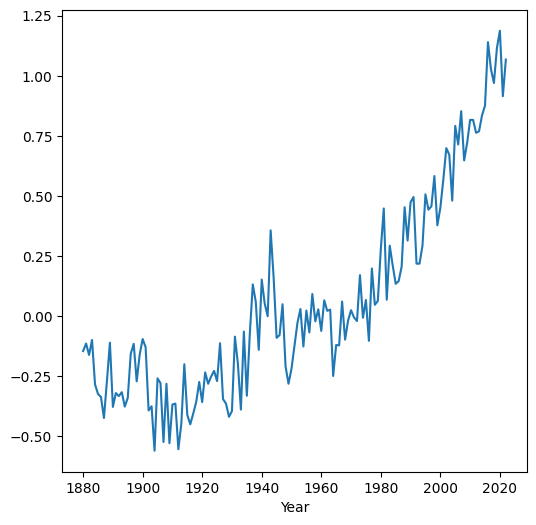

In [18]:
dat.set_index('Year')['mean'].plot();

(apply-and-custom-functions)=
### `apply` and custom functions

In case we need to apply a custom function on each row, or column, we can use the `.apply` method combined with a lambda function (see {ref}`lambda-functions`). For example, here is an alternative way to calculate row-wise means, using the `.apply` method and a lambda function. The result is the same as `regions.mean()` (see {ref}`pandas-row-colwise-built-in`):

In [19]:
regions.apply(lambda x: x.mean())

90S-64S   -0.080769
64S-44S   -0.056783
44S-24S    0.044126
24S-EQU    0.080140
EQU-24N    0.059161
24N-44N    0.035455
44N-64N    0.130909
64N-90N    0.257692
dtype: float64

The advantage is that we can use any custom expression inside the lambda function definition. For example, the following expression calculates whether any region had temperature anomaly above 1 degree, for each of the 140 years. Note the `axis=1` part, which determines that, this time, the function is applied on each *row*:

In [20]:
regions.apply(lambda x: (x > 1).any(), axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
138     True
139     True
140     True
141     True
142     True
Length: 143, dtype: bool

```{admonition} Exercise 06-b
:class: important
* Function `np.polyfit` can be used to calculate the slope of linear regression between two columns. For example, using the code section shown below, you can find out that the linear trend of temperature in the `'44S-24S'` region was an increasing one, at `0.0066` degrees per year. 
* Adapt the code into to the form of a function named `slope` which, given two `Series` objects `x` and `y`, calculates the linear slope. For example, `f(dat['Year'],regions['44S-24S'])` should return `0.0066`.
* Use the `slope` function you defined within the `.apply` method, to calculate the slope in all columns of `regions` at once. 
* Hint: you need to keep the `x` argument of `slope` fixed at `dat['Year']`, while the various columns of `regions` are passed to `y`. To do that, write another function (or use a lambda function) that "wraps" `slope` and runs it with just the `y` parameter (keeping `x` fixed). 

```py
x = dat['Year']
y = regions['44S-24S']
np.polyfit(x, y, 1)[0]
```

(pandas-joining-tables)=
## Joining tables

### Overview

One of the most common operations when working with data is a *table join*. In a table join, two tables are combined into one, based on one or more common column(s). For example, when compiling a dataset about different cities, we may collect data on different aspects of each cities (population size, socio-economic status, built area, etc.) from different sources. To work with these data together, the various tables need to be joined into one. The common column, in this case, would be the city name or city ID. 

When working with `pandas`, tables can be joined, based on one or more common column, using the [`pd.merge`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) function. The `pd.merge` has the following important parameters:

* `left`—The first ("left") table
* `right`—The second ("right") table
* `how`—The type of join, one of: `'left'`, `'right'`, `'outer'`, `'inner'` (the default), `'cross'`
* `on`—The name(s) of the common column(s) where identical values are considered a "match"

The *type* of join (the `how` parameter) basically determines what should be done with non-matching records. The options are `'left'`, `'right'`, `'outer'`, `'inner'` (the default), and `'cross'`. The meaning of the join types is the same as in SQL [^sql-join-types], and will be demonstrated through examples below. 

[^sql-join-types]: For a visual explanation of join types, see <https://dataschool.com/how-to-teach-people-sql/sql-join-types-explained-visually/>.

### Stations example

For a first small example, let us get back to the `stations` table:

In [21]:
stations

,name,city,lines,piano,lon,lat
0,Beer-Sheva Center,Beer-Sheva,4,False,34.798443,31.243288
1,Beer-Sheva University,Beer-Sheva,5,True,34.812831,31.260284
2,Dimona,Dimona,1,False,35.011635,31.068616


Suppose we have another small table named `status` which describes the status (`'Closed'` or `'Open'`) of select stations:

In [22]:
name = pd.Series(['Beer-Sheva Center', 'Beer-Sheva University', 'Tel-Aviv University'])
status = pd.Series(['Closed', 'Open', 'Open'])
status = pd.DataFrame({'name': name, 'status': status})
status

,name,status
0,Beer-Sheva Center,Closed
1,Beer-Sheva University,Open
2,Tel-Aviv University,Open


The `stations` and `status` can be joined as follows:

In [23]:
pd.merge(stations, status)

,name,city,lines,piano,lon,lat,status
0,Beer-Sheva Center,Beer-Sheva,4,False,34.798443,31.243288,Closed
1,Beer-Sheva University,Beer-Sheva,5,True,34.812831,31.260284,Open


This implies the default, `on` being equal to the column(s) sharing the same name in both tables (`on='name'`, in this case), and an `'inner'` join (i.e., `how='inner'`). As you can see, an inner join returns just the matching rows. It is better to be explicit, for clarity:

In [24]:
pd.merge(stations, status, on='name', how='inner')

,name,city,lines,piano,lon,lat,status
0,Beer-Sheva Center,Beer-Sheva,4,False,34.798443,31.243288,Closed
1,Beer-Sheva University,Beer-Sheva,5,True,34.812831,31.260284,Open


Unlike an `'inner'` join, a `'left'` join returns all records from the first ("left") table, even those that have no match in the second ("right") table. For example, `'Dimona'` station does not appear in the `status` table, but it is still returned in the result (with `status` value set to `np.nan`):

In [25]:
pd.merge(stations, status, on='name', how='left')

,name,city,lines,piano,lon,lat,status
0,Beer-Sheva Center,Beer-Sheva,4,False,34.798443,31.243288,Closed
1,Beer-Sheva University,Beer-Sheva,5,True,34.812831,31.260284,Open
2,Dimona,Dimona,1,False,35.011635,31.068616,NaN


A `'right'` join is the opposite of a `'left'` join, i.e., it returns all records from the "right" table, even those that have no match in the "left" table. This time, values absent in the "left" table are set to `np.nan`:

In [26]:
pd.merge(stations, status, on='name', how='right')

,name,city,lines,piano,lon,lat,status
0,Beer-Sheva Center,Beer-Sheva,4.0,False,34.798443,31.243288,Closed
1,Beer-Sheva University,Beer-Sheva,5.0,True,34.812831,31.260284,Open
2,Tel-Aviv University,NaN,NaN,NaN,NaN,NaN,Open


Finally, an `'outer'` (also known as "full") join returns all record from both tables, regardless of whether they have a matching record in the other table. Values that have no match in both the "left" and "right" tables are set to `np.nan`:

In [27]:
pd.merge(stations, status, on='name', how='outer')

,name,city,lines,piano,lon,lat,status
0,Beer-Sheva Center,Beer-Sheva,4.0,False,34.798443,31.243288,Closed
1,Beer-Sheva University,Beer-Sheva,5.0,True,34.812831,31.260284,Open
2,Dimona,Dimona,1.0,False,35.011635,31.068616,NaN
3,Tel-Aviv University,NaN,NaN,NaN,NaN,NaN,Open


When working with data, we often have one main, or "template", table we are working with ("left") and we are interested to join data coming from another external ("right") table to it. In this scenario we usually prefer not to lose any records from the "left" table. Even if some of the records have no match and get "No Data" values (namely, `np.nan`), we usually prefer to keep those records and deal with the missing values as necessary, rather than lose the records altogether. Therefore, a `'left'` join is often most useful in data analysis. For example, in the above situation a `"left"` join makes sense if our focus is on the station properties given in `stations`, so that even though the `status` of the `"Dimona"` station is unknown we prefer to keep the `'Dimona'` record. 

(what-is-gtfs)=
### What is GTFS?

In the next examples, we demonstrate table join with a more realistic large datasets on public transport known as *GTFS*. Before we go into the example, we need to be familiar with the GTFS format and structure. 

The General Transit Feed Specification (GTFS) is a standard format for describing public transport routes and timetables. GTFS is typically published by government transport agencies, periodically. For example, the GTFS dataset provided as part of the book's sample data was downloaded from Israel ministry of transport [GTFS website](https://www.gov.il/he/departments/general/gtfs_general_transit_feed_specifications) on `2023-09-30`. GTFS data is used by commercial companies, such as for routing in Google Maps. 

Technically, a GTFS dataset is composed of several CSV files (even though their file extension is `.txt`), which are linked via common columns, or *keys*. In this book, we are going to use only some of the files in the GTFS datasets, namely the six files listed in {numref}`gtfs-files`. Recall that we already met one of the GTFS files, namely `'stops.txt'`, earlier, in an example of text file processing through `for` loops (see {ref}`file-object-and-reading-lines`).

```{table} GTFS files used in the examples
:name: gtfs-files

| Name | Contents | Keys | 
|---|---|---|
| `agency.txt` | Agencies | `agency_id` | 
| `routes.txt` | Routes | `route_id`, `agency_id` |
| `trips.txt` | Trips | `route_id`, `trip_id`, `shape_id` |
| `stop_times.txt` | Stop times | `trip_id`, `stop_id` | 
| `stops.txt` | Stops | `stop_id` | 
| `shapes.txt` | Shapes | `shape_id` |
```

Let us see what the GTFS tables look like, what is their purpose, and how are they related with one another. To make things easier, we immediately subset the most important columns, which are also the ones we use in subsequent examples.

We start with `'agency.txt'`. This file lists the public transport agencies. Each row represents one agency, identified by `'agency_id'` (note that we are using `usecols` to read just the necessary columns from the CSV file):

In [31]:
pd.read_csv('data/gtfs/agency.txt', usecols=['agency_id', 'agency_name'])

,agency_id,agency_name
0,2,רכבת ישראל
1,3,אגד
2,4,אלקטרה אפיקים תחבורה
3,5,דן
4,6,ש.א.מ
...,...,...
31,51,ירושלים-צור באהר איחוד
32,91,מוניות מטרו קו
33,93,מוניות מאיה יצחק שדה
34,97,אודליה מוניות בעמ


```{note}
`pd.read_csv` uses the `'utf-8'` encoding by default. All sample CSV files in this book are in the UTF-8 encoding, so there is no need to specify the encoding when reading them with `pd.read_csv`. Otherwise, the right encoding can be specified with the `encoding` parameter of `pd.read_csv`.
```

The next file we look into is `'routes.txt'`. This file describes the public transport routes, identified by `'route_id'` and also specifying the name of the route: 
* `'route_short_name'`—typically a number, such as bus line number 
* `'route_long_name'`—the route textual description

It also contains `'agency_id'` to identify the agency which operates each route:

In [32]:
cols = ['route_id', 'agency_id', 'route_short_name', 'route_long_name']
pd.read_csv('data/gtfs/routes.txt', usecols=cols)

,route_id,agency_id,route_short_name,route_long_name
0,1,25,1,ת. רכבת יבנה מערב-יבנה<->ת. רכב...
1,2,25,1,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...
2,3,25,2,ת. רכבת יבנה מערב-יבנה<->ת. רכב...
3,4,25,2א,ת. רכבת יבנה מערב-יבנה<->ת. רכב...
4,5,25,2,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...
...,...,...,...,...
8183,37315,2,NaN,תא אוניברסיטה-תל אביב יפו<->באר...
8184,37316,2,NaN,תא אוניברסיטה-תל אביב יפו<->הרצ...
8185,37342,6,46,גן טכנולוגי-נצרת<->מסרארה חט''ב...
8186,37343,6,46,גן טכנולוגי-נצרת<->מסרארה חט''ב...


The `'routes.txt'` table is linked to the `'trips.txt'` table, which characterizes trips taking place at specific *times of day* for a given route. Trips are uniquely identified by `'trip_id'` and linked with the routes table via the `'route_id'` column. As you can see from the small subset below, each route may be associated with multiple trips. The trips table also has a `'shape_id'` column which associates a trip with the geographical line geometry (see `'shapes.txt'` below). You can see that trips of the same route at different times of day typically follow exactly the same geographical shape, thus having identical `'shape_id'` values, but this is not guaranteed:

In [33]:
cols = ['route_id', 'trip_id', 'shape_id']
pd.read_csv('data/gtfs/trips.txt', usecols=cols)

,route_id,trip_id,shape_id
0,60,3764_081023,126055.0
1,68,3143332_011023,128020.0
2,68,3143338_011023,128020.0
3,68,3244955_011023,128020.0
4,68,3244956_011023,128020.0
...,...,...,...
398086,43,2827_081023,127560.0
398087,43,17254928_011023,127560.0
398088,43,2796_011023,127560.0
398089,43,2806_011023,127560.0


The `'stop_times.txt'` table lists the stops associated with each trip (via the `'trip_id'` column), including the (estimated) time of arrival at each stop. The stop times table also includes the `'stop_id'` column to associate it with the stop characteristics (see `'stops.txt'` below). In addition, the `'shape_dist_traveled'` column contains cumulative distance traveled at each stop. You can see the increasing distance traveled from one from stop to another (in the same trip) in the printout below. The `'stop_times.txt'` table is the larges one, in terms of file size, among the GTFS files: keep in mind that it lists all stops, at all times of day, of all public transport routes:

In [36]:
cols = ['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'shape_dist_traveled']
pd.read_csv('data/gtfs/stop_times.txt', usecols=cols)

,trip_id,arrival_time,departure_time,stop_id,shape_dist_traveled
0,1_011023,05:10:00,05:10:00,38725,0.0
1,1_011023,05:12:23,05:12:23,15582,714.0
2,1_011023,05:13:20,05:13:20,15583,1215.0
3,1_011023,05:14:31,05:14:31,16086,1791.0
4,1_011023,05:15:09,05:15:09,16085,2152.0
...,...,...,...,...,...
15169524,9999194_151023,20:19:45,20:19:45,9272,12666.0
15169525,9999194_151023,20:20:59,20:20:59,11495,12970.0
15169526,9999194_151023,20:21:59,20:21:59,9550,13237.0
15169527,9999194_151023,20:22:40,20:22:40,10483,13395.0


The `'stops.txt'` table, which we already worked with earlier (see {ref}`reading-csv-files`), describes the fixed, i.e., unrelated to time of day, properties of the stops. It is linked with the `'stops_time.txt'` table via the `'stop_id'` column. Stop properties include the stop name (`'stop_name'`), and its coordinates (`'stop_lon'` and `'stop_lat'`):

In [37]:
cols = ['stop_id', 'stop_name', 'stop_lat', 'stop_lon']
pd.read_csv('data/gtfs/stops.txt', usecols=cols)

,stop_id,stop_name,stop_lat,stop_lon
0,1,בי''ס בר לב/בן יהודה,32.183985,34.917554
1,2,הרצל/צומת בילו,31.870034,34.819541
2,3,הנחשול/הדייגים,31.984553,34.782828
3,4,משה פריד/יצחק משקה,31.888325,34.790700
4,6,ת. מרכזית לוד/הורדה,31.956392,34.898098
...,...,...,...,...
34002,50182,מסוף שכונת החותרים/הורדה,32.748564,34.966691
34003,50183,מסוף שכונת החותרים/איסוף,32.748776,34.966844
34004,50184,מדבריום,31.260857,34.744373
34005,50185,כביש 25/מדבריום,31.263478,34.747607


Finally, the `'shapes.txt'` table contains the trip geometries. It is linked with the `'trips.txt'` table via the common `'shape_id'` column. 

In [38]:
cols = ['shape_id', 'shape_pt_lat', 'shape_pt_lon', 'shape_pt_sequence']
pd.read_csv('data/gtfs/shapes.txt', usecols=cols)

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,69895,32.164723,34.848813,1
1,69895,32.164738,34.848972,2
2,69895,32.164771,34.849177,3
3,69895,32.164841,34.849429,4
4,69895,32.164889,34.849626,5
...,...,...,...,...
7546509,146260,32.084831,34.796385,953
7546510,146260,32.084884,34.796040,954
7546511,146260,32.084908,34.795895,955
7546512,146260,32.084039,34.795698,956


The relations between the six above-mentioned files in the GTFS dataset are summarized in {numref}`gtfs-files-drawing`.

```{figure} images/gtfs_files_drawing.svg
---
name: gtfs-files-drawing
---
Relation between the six GTFS files listed in {numref}`gtfs-files`
```

(pandas2-gtfs-example)=
### GTFS example

Now that we have an idea about the structure and purpose of the GTFS dataset, let us demonstrate join operations between its tables. This is a classical example where joining tables is essential: you cannot go very far with GTFS data analysis, or processing, without joining the various tables together (see {numref}`gtfs-files-drawing`).

To make things simple, in this example, consider just two of the tables in the GTFS dataset:

* `'agency.txt'`, where rows represent public transport *operators*
* `'routes.txt'`, where rows represent public transport *routes*

As shown above (see {ref}`what-is-gtfs`), the two tables share a common column `'agency_id'`, which we can use to join the two, to find out which public routes belong to each operator.

First, let us import the `'agency.txt'` table and subset the columns of interest, `'agency_id'` and `'agency_name'`:

In [39]:
agency = pd.read_csv('data/gtfs/agency.txt', usecols=['agency_id', 'agency_name'])
agency

,agency_id,agency_name
0,2,רכבת ישראל
1,3,אגד
2,4,אלקטרה אפיקים תחבורה
3,5,דן
4,6,ש.א.מ
...,...,...
31,51,ירושלים-צור באהר איחוד
32,91,מוניות מטרו קו
33,93,מוניות מאיה יצחק שדה
34,97,אודליה מוניות בעמ


Second, we import the `routes.txt` table, this time selecting the `'route_id'`, `'agency_id'`, `'route_short_name'`, and `'route_long_name'` columns. Note the common `'agency_id'` column, which we are going to use when joining the two tables:

In [40]:
cols = ['route_id', 'agency_id', 'route_short_name', 'route_long_name']
routes = pd.read_csv('data/gtfs/routes.txt', usecols=cols)
routes

,route_id,agency_id,route_short_name,route_long_name
0,1,25,1,ת. רכבת יבנה מערב-יבנה<->ת. רכב...
1,2,25,1,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...
2,3,25,2,ת. רכבת יבנה מערב-יבנה<->ת. רכב...
3,4,25,2א,ת. רכבת יבנה מערב-יבנה<->ת. רכב...
4,5,25,2,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...
...,...,...,...,...
8183,37315,2,NaN,תא אוניברסיטה-תל אביב יפו<->באר...
8184,37316,2,NaN,תא אוניברסיטה-תל אביב יפו<->הרצ...
8185,37342,6,46,גן טכנולוגי-נצרת<->מסרארה חט''ב...
8186,37343,6,46,גן טכנולוגי-נצרת<->מסרארה חט''ב...


Now, we can join the `routes` and `agency` tables based on the common `'agency_id'` column:

In [36]:
routes = pd.merge(routes, agency, on='agency_id', how='left')
routes

,route_id,agency_id,route_short_name,route_long_name,agency_name
0,1,25,1,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,אלקטרה אפיקים
1,2,25,1,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...,אלקטרה אפיקים
2,3,25,2,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,אלקטרה אפיקים
3,4,25,2א,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,אלקטרה אפיקים
4,5,25,2,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...,אלקטרה אפיקים
...,...,...,...,...,...
8183,37315,2,NaN,תא אוניברסיטה-תל אביב יפו<->באר...,רכבת ישראל
8184,37316,2,NaN,תא אוניברסיטה-תל אביב יפו<->הרצ...,רכבת ישראל
8185,37342,6,46,גן טכנולוגי-נצרת<->מסרארה חט''ב...,ש.א.מ
8186,37343,6,46,גן טכנולוגי-נצרת<->מסרארה חט''ב...,ש.א.מ


Now we have the additional `'agency_name'` column in the `routes` table, which tells us the name of the operator for each route.

```{note}
For more information and examples of `pd.merge`, check out the following official tutorials from the `pandas` documentation: 
* [Join tables using a common identifier](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)
* [Database-style `DataFrame` or named `Series` joining/merging](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)
```

(pandas-aggregation)=
## Aggregation

### Overview

Aggregation is a commonly used to summarize tabular data. In an aggregation procedure, a function is applied on *subsets* of table rows, whereas subsets are specified through one or more grouping variables, to obtain a new (smaller) table with summaries per group. Aggregation is one of the techniques following the [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) concept.

In `pandas`, there are several different ways of specifying the function(s) to be applied on the table column(s). We will go over three commonly used scenarios:

* {ref}`aggregation-same-function-on-all-columns`
* {ref}`aggregation-different-functions` on each column
* {ref}`aggregate-custom-functions`

Afterwards, we are going to introduce a useful shortcut for a particularly common type of aggregation: counting the occurence of each unique value in a column (see {ref}`pandas-value-counts`).

(aggregation-same-function-on-all-columns)=
### Same function on all columns

For a minimal example of aggregation, let us consider the small table named `stations`:

In [37]:
stations

,name,city,lines,piano,lon,lat
0,Beer-Sheva Center,Beer-Sheva,4,False,34.798443,31.243288
1,Beer-Sheva University,Beer-Sheva,5,True,34.812831,31.260284
2,Dimona,Dimona,1,False,35.011635,31.068616


Suppose that we are interested in the number of lines (the `lines` column) and the number of stations with a piano (the `piano` column), which involves summing the values in those two columns. We already know how the *totals*, i.e., sums of each column, can be calculated (see {ref}`pandas-row-col-wise-operations`):

In [38]:
stations[['lines', 'piano']].sum()

lines    10
piano     1
dtype: int64

However, what if we wanted to calculate the number of lines and stations with a piano per town, *separately*? To do that, we basically need to *split* the table according to the `'city'` column, then apply the `.sum` method on each subset. Here is how this can be done. Instead of simply using `.sum`, we split (or "group") the table by `'city'`, and only then apply the `.sum` method. Splitting is done using the `.groupby` method, which accepts the column name (or `list` of column names) that specifies the grouping:

In [39]:
stations[['city', 'lines', 'piano']].groupby('city').sum()

,lines,piano
city,,
Beer-Sheva,9,1
Dimona,1,0


Note that the grouping variable(s) become the *index* of the resulting `DataFrame`. For our purposes, we are usually going to prefer to work with the grouping variable in its own column. In such case, we end the expression with `.reset_index()` (see {ref}`resetting-the-index`):

In [40]:
stations[['city', 'lines', 'piano']].groupby('city').sum().reset_index()

,city,lines,piano
0,Beer-Sheva,9,1
1,Dimona,1,0


```{note}
Tables can also be grouped by two or more columns, in which case the column names are passed in a `list`, as in `dat.groupby(['a','b'])`, where `'a'` and `'b'` are column names in `dat`.
```

The `.sum` method is just one example, there are many other useful functions we can use, such as the ones listed in {numref}`pandas-aggregation-methods`. For example, to get the first row per group we can combine `.groupby` with the `.first` method:

In [41]:
stations.groupby('city').first().reset_index()

,city,name,lines,piano,lon,lat
0,Beer-Sheva,Beer-Sheva Center,4,False,34.798443,31.243288
1,Dimona,Dimona,1,False,35.011635,31.068616


For a more realistic example, consider the `routes` table:

In [42]:
routes

,route_id,agency_id,route_short_name,route_long_name,agency_name
0,1,25,1,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,אלקטרה אפיקים
1,2,25,1,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...,אלקטרה אפיקים
2,3,25,2,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,אלקטרה אפיקים
3,4,25,2א,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,אלקטרה אפיקים
4,5,25,2,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...,אלקטרה אפיקים
...,...,...,...,...,...
8183,37315,2,NaN,תא אוניברסיטה-תל אביב יפו<->באר...,רכבת ישראל
8184,37316,2,NaN,תא אוניברסיטה-תל אביב יפו<->הרצ...,רכבת ישראל
8185,37342,6,46,גן טכנולוגי-נצרת<->מסרארה חט''ב...,ש.א.מ
8186,37343,6,46,גן טכנולוגי-נצרת<->מסרארה חט''ב...,ש.א.מ


We can use aggregation with the `.nunique` ({numref}`pandas-aggregation-methods`) function to calculate the number of unique route IDs that each public transport agency operates, as follows:

In [43]:
tmp = routes[['agency_name', 'route_id']].groupby('agency_name').nunique().reset_index()
tmp

,agency_name,route_id
0,אגד,1621
1,אודליה מוניות בעמ,2
2,אלקטרה אפיקים,413
3,אלקטרה אפיקים תחבורה,297
4,אקסטרה,65
...,...,...
31,קווים,1161
32,רכבת ישראל,1008
33,ש.א.מ,158
34,תבל,5


To find out which agencies have the most routes, the resulting table can be sorted using `.sort_values` combined with `ascending=False` (see {ref}`pandas-sorting`):

In [44]:
tmp.sort_values('route_id', ascending=False)

,agency_name,route_id
0,אגד,1621
31,קווים,1161
32,רכבת ישראל,1008
27,מטרופולין,691
29,נתיב אקספרס,577
...,...,...
20,כפיר,3
21,כרמלית,2
19,כבל אקספרס,2
1,אודליה מוניות בעמ,2


```{admonition} Exercise 06-c
:class: important
* Calculate a series of global temperature means for each *decade*, based on the information in the `dat`. 
* First, you need to create a new variable named `decade` based on the `'Year'`, using an expression such as the one shown below.
* Second, use `.groupby` to calculate the mean global temperature in each decade.

```py
dat['Year'] // 10 * 10
```

```{admonition} Exercise 06-d
:class: important
* The `routes.txt` table describes public transport routes (uniquely identified by `route_id`). The `trips.txt` table, however, descibes specific journeys of a along those routes, at a specific time of day (uniquely identified by `trip_id`). The two tables are associated with one another via the common `route_id` column (see {ref}`what-is-gtfs`). For example, a route that operates five times a day will be represented in one row in the `routes.txt` table, and five rows in the `trips.txt` table.
* Join `routes.txt` to `trips.txt`, using the common `route_id` column.
* Calculate a table with the number of unique `trip_id`'s per `route_id`.
* Sort the table according to number of unique trips, and print a summary with the numbers and names (`route_short_name` and `route_long_name` columns from `routes.txt`, respectively) of the most and least frequent routes ({numref}`exercise-06-c`).
```

```{glue:figure} exercise-06-c
---
name: exercise-06-c
---
Solution of exercise-06-c
```

(aggregation-different-functions)=
### Different functions (`agg`)

Sometimes we need to aggregate a `DataFrame` while applying a different function on each column, rather than the same function on all columns. For the next example, consider the `world_cities.csv` file, which contains information about all major cities in the world:

In [45]:
cities = pd.read_csv('data/world_cities.csv')
cities

,city,country,pop,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0
4,'Abud,Palestine,2456,32.03,35.07,0
...,...,...,...,...,...,...
43640,az-Zubayr,Iraq,124611,30.39,47.71,0
43641,az-Zulfi,Saudi Arabia,54070,26.30,44.80,0
43642,az-Zuwaytinah,Libya,21984,30.95,20.12,0
43643,s-Gravenhage,Netherlands,479525,52.07,4.30,0


Suppose we want to summarize the information per country (`"country"` column). However, we want each column to be treated differently:

* The city names (`'city'` column) will be *counted* 
* Population (`'pop'` column) will be *summed*
* Longitude and latitude (`'lon'` and `'lat'` columns, respectively) will be *averaged*

This can be done using the [`.agg`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) method applied on a *grouped* `DataFrame`, instead of a specific function, such as `nunique`. The `.agg` method accepts a dictionary, with `key:value` pairs of the form `'column':function`, where: 

* `'column'`—name of the column to be aggregated
* `function`—the function to apply on each group in that column. This can be:
    * a *string* referring to a `pandas` function (such as `'nunique'`, see {numref}`pandas-aggregation-methods`)
    * a plain *function* that can be applied on a `Series`, such as `np.mean` or `np.sum`

In our case, the aggregation expression is as follows. As a result, we get a new table where each row represents a country, with the count of unique city names, sum of the population across all cities, and average longitute and latitude across all cities:

In [46]:
cities.groupby('country').agg({
    'city': 'nunique', 
    'pop': np.sum, 
    'lon': np.mean, 
    'lat': np.mean
}).reset_index()

/tmp/ipykernel_4019/2985202954.py:1: FutureWarning: The provided callable <function sum at 0x7fbc20198b80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cities.groupby('country').agg({
/tmp/ipykernel_4019/2985202954.py:1: FutureWarning: The provided callable <function mean at 0x7fbc20199ab0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  cities.groupby('country').agg({


,country,city,pop,lon,lat
0,Afghanistan,115,7543856,66.920342,34.807692
1,Albania,67,1536232,19.975522,41.087463
2,Algeria,315,20508642,3.535443,35.467025
3,American Samoa,35,58021,-170.663714,-14.299143
4,Andorra,7,69031,1.538571,42.534286
...,...,...,...,...,...
234,Wallis and Futuna,23,11380,-176.585652,-13.512609
235,Western Sahara,4,338786,-13.820000,25.935000
236,Yemen,30,5492077,45.088667,14.481000
237,Zambia,73,4032170,28.179315,-13.404247


(aggregate-custom-functions)=
### Custom functions (`agg`)

Finally, sometimes we need to apply a custom function when aggregating a table. For example, suppose that we need to calculate the population difference between the most populated, and least populated, cities, in each country. To do that, we can define our own function, named `diff_max_min`, which: 

* accepts a `Series` named `x`, and 
* returns the difference between the maximum and minimum, `x.max()-x.min()`.

Here is the function definition:

In [47]:
def diff_max_min(x):
    return x.max() - x.min()

It is worthwhile to test the function, to make sure it works as expected:

In [48]:
diff_max_min(pd.Series([15, 20, 4, 12, 6]))

16

Now, we can use the function inside the `.agg` expression, just like any other predefined function:

In [49]:
cities.groupby('country').agg({
    'city': 'nunique', 
    'pop': diff_max_min
}).reset_index()

,country,city,pop
0,Afghanistan,115,3117579
1,Albania,67,379803
2,Algeria,315,2024344
3,American Samoa,35,11341
4,Andorra,7,17740
...,...,...,...
234,Wallis and Futuna,23,1142
235,Western Sahara,4,146906
236,Yemen,30,1918607
237,Zambia,73,1305210


For example, here is how the "new" pop value is obtained for the first country (`'Afghanistan'`):

In [50]:
diff_max_min(cities[cities['country'] == 'Afghanistan']['pop'])

3117579

Alternatively, we can use a lambda function (see {ref}`lambda-functions`), to do the same, using more concise syntax:

In [51]:
cities.groupby('country').agg({
    'city': 'nunique', 
    'pop': lambda x: x.max() - x.min()
}).reset_index()

,country,city,pop
0,Afghanistan,115,3117579
1,Albania,67,379803
2,Algeria,315,2024344
3,American Samoa,35,11341
4,Andorra,7,17740
...,...,...,...
234,Wallis and Futuna,23,1142
235,Western Sahara,4,146906
236,Yemen,30,1918607
237,Zambia,73,1305210


```{note}
For more information and examples on aggregation, and other types of split-apply-combine operations which we have not mentioned, see <https://pandas.pydata.org/docs/user_guide/groupby.html#aggregation>.
```

(pandas-value-counts)=
## Value counts

A very common type of aggregation is to calculate how many times each unique value is "repeated" in a `Series`. For example, to find out how many times each country appears in the `cities` table, we can group the table by `"country"`, then apply `.count` on any other column (such as `"city"`):

In [52]:
cities[['country', 'city']].groupby('country').count().reset_index()

,country,city
0,Afghanistan,117
1,Albania,67
2,Algeria,316
3,American Samoa,35
4,Andorra,7
...,...,...
234,Wallis and Futuna,23
235,Western Sahara,4
236,Yemen,30
237,Zambia,73


However, this expression is quite long and not straightforward. Instead, `pandas` defines a much shorter way to count unique values, namely the `value_counts` method. For example:

In [53]:
cities['country'].value_counts()

country
France            1000
Greece            1000
Romania            999
Japan              999
Germany            998
                  ... 
Saint-Martin         1
Norfolk Island       1
Gibraltar            1
Easter Island        1
Nauru                1
Name: count, Length: 239, dtype: int64

The result is a `Series` where the index is the country name, and the values are the counts. It tells us how many times each unique value in the `"country"` column is repeated, that is, how many rows (i.e., cities) are there in the table for that country. For example, `"France"` is repeated over `1000` rows.

As you can see, the resuling `Series` is sorted by count, from highest to lowest. In case we need to sort by index, i.e., by country name, we can use the [`.sort_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html) method:

In [54]:
cities['country'].value_counts().sort_index()

country
Afghanistan          117
Albania               67
Algeria              316
American Samoa        35
Andorra                7
                    ... 
Wallis and Futuna     23
Western Sahara         4
Yemen                 30
Zambia                73
Zimbabwe              76
Name: count, Length: 239, dtype: int64

```{admonition} Exercise 06-e
:class: important
* How often is there more than one shape (`shape_id`) for the same route (`route_id`)? 
* Use the `trips.txt` table to calculate the number of unique values of `shape_id` for each `route_id`.
* Summarize the resulting column to calculate how many `route_id`s has `0`, `1`, `2`, etc. of `shape_id`. (answer: `4` routes have zero `shape_id`, `112` have two, and `7135` have one)
```

(exercise-pandas2)=
## More exercises

```{admonition} Exercise 06-f
:class: important
* Read the `'agency.txt'`, `'routes.txt'`, `'trips.txt'`, and `'shapes.txt'` tables (located in the `gtfs` directory).
* Subset just the `'דן באר שבע'` operator routes from the `routes` table (first find out its `agency_id` in the `agency` table)
* Subset only those `routes` where `'route_short_name'` is `'24'` (i.e., routes of bus `'24'`)
* Join the routes table with `trips` and filter to retain just one trip (the first `trip_id`)
* Join the trip table with `shapes`
* Print the resulting table with the shape coordinates of one of the trips of bus `'24'` ({numref}`exercise-06-f1`)
* Create a scatterplot of the trip coordinates, with `'shape_pt_lon'` values on the x-axis and `'shape_pt_lat'` values on the y-axis ({numref}`exercise-06-f2`)
```

```{glue:figure} exercise-06-f1
---
name: exercise-06-f1
---
Solution of exercise-06-f: Coordinates of the 1<sup>st</sup> trip of bus `'24'` by ``'דן באר שבע'``
```

```{glue:figure} exercise-06-f2
---
name: exercise-06-f2
---
Solution of exercise-06-f: Coordinates of the 1<sup>st</sup> trip of bus `'24'` by ``'דן באר שבע'``
```

```{admonition} Exercise 06-g
:class: important
* In this exercise, you are going to find the names of the five longest bus routes (in terms of distance traveled) in Israel. To do that, go through the following steps.
* Read the `stop_times.txt` table and select just the `'trip_id'` and `'shape_dist_traveled'` columns. 
* Calculate the maximum (i.e., total) distance traveled (`'shape_dist_traveled'`) for each public transit trip (`'trip_id'`) ({numref}`exercise-06-g1`).
* Read the `trips.txt` table and select just the `'trip_id'`, and `'route_id'`.
* Join the resulting `trips` table with the `stop_times` table from the previous step (using the common `"trip_id"` column), to get the `'route_id'` value of each trip.
* Retain just one (the first) trip per `'route_id'` ({numref}`exercise-06-g2`).
* Read the `routes.txt` table and subset the `'route_id'`, `'route_short_name'`, and `'route_long_name'` columns.
* Join the resulting table with the trips table (using the common `'route_id'` column), to get the `'route_short_name'` and `'route_long_name'` values of each route ({numref}`exercise-06-g3`).
* Sort the table according to `'shape_dist_traveled'` (from largest to smallest), and print the first five rows ({numref}`exercise-06-g4`). Those are the longest-distance public transport routes in the GTFS dataset.
* Convert the `'route_long_name'` values of the first five rows from the previous step, collect them into a `list`, and print the `list`, to see the full names of the routes. You can see that all five routes are from Haifa to Eilat or the other way around.
```

```{glue:figure} exercise-06-g1
---
name: exercise-06-g1
---
Solution of exercise-06-g: Total distance traveled in each trip, based on `stop_times.txt`
```

```{glue:figure} exercise-06-g2
---
name: exercise-06-g2
---
Solution of exercise-06-g: Joined with `trips.txt`, selecting just the 1<sup>st</sup> trips per `route_id`
```

```{glue:figure} exercise-06-g3
---
name: exercise-06-g3
---
Solution of exercise-06-g: Joined with `routes.txt`
```

```{glue:figure} exercise-06-g4
---
name: exercise-06-g4
---
Solution of exercise-06-g: Sorted by `shape_dist_traveled`, from largest to smallest
```

## Exercise solutions

In [55]:
from myst_nb import glue

### Exercise 06-b

In [ ]:
import numpy as np
import pandas as pd
# Read data
dat = pd.read_csv('data/ZonAnn.Ts+dSST.csv')
cols = ['90S-64S', '64S-44S', '44S-24S', '24S-EQU', 'EQU-24N', '24N-44N', '44N-64N', '64N-90N']
regions = dat[cols]
# Function to calculate linear slope
def f(x, y): 
    return np.polyfit(x, y, 1)[0]
f(dat['Year'], regions['44S-24S'])

0.006632501451200857

In [58]:
# Calculate slopes per region
regions.apply(lambda i: f(dat['Year'], i), axis=0)

90S-64S    0.006063
64S-44S    0.005141
44S-24S    0.006633
24S-EQU    0.006420
EQU-24N    0.006456
24N-44N    0.008097
44N-64N    0.011755
64N-90N    0.018612
dtype: float64

### Exercise 06-d

In [59]:
import pandas as pd
# Read
routes = pd.read_csv('data/gtfs/routes.txt')
trips = pd.read_csv('data/gtfs/trips.txt')
# Join
dat = pd.merge(trips, routes, on='route_id', how='left')
# Calculate number of unique trips per route
dat = dat.groupby(['route_id', 'route_short_name', 'route_long_name']).nunique()['trip_id'].reset_index()
# Sort
dat = dat.sort_values('trip_id', ascending=False)
dat

,route_id,route_short_name,route_long_name,trip_id
678,2256,4,מסוף הטייסים-תל אביב יפו<->מסוף...,1001
677,2255,4,מסוף רידינג/רציפים-תל אביב יפו<...,934
3170,11525,6,אבי עזרי א-מודיעין עילית<->רמב'...,840
3171,11526,6,שדרות בית שמאי/שדרות בית הלל-מו...,830
2746,10509,1,קדושת לוי/שלום רב-ביתר עילית<->...,748
...,...,...,...,...
2291,9539,24,חמת גדר-עמק הירדן<->ת. מרכזית ט...,1
1190,4402,251,ת. מרכזית המפרץ/רציפים בינעירונ...,1
1199,4443,271,ת. מרכזית נהריה/רציפים-נהריה<->...,1
1204,4450,273,אוניברסיטה/רב תכליתי-חיפה<->ת. ...,1


In [60]:
glue('exercise-06-c', dat)

,route_id,route_short_name,route_long_name,trip_id
678,2256,4,מסוף הטייסים-תל אביב יפו<->מסוף...,1001
677,2255,4,מסוף רידינג/רציפים-תל אביב יפו<...,934
3170,11525,6,אבי עזרי א-מודיעין עילית<->רמב'...,840
3171,11526,6,שדרות בית שמאי/שדרות בית הלל-מו...,830
2746,10509,1,קדושת לוי/שלום רב-ביתר עילית<->...,748
...,...,...,...,...
2291,9539,24,חמת גדר-עמק הירדן<->ת. מרכזית ט...,1
1190,4402,251,ת. מרכזית המפרץ/רציפים בינעירונ...,1
1199,4443,271,ת. מרכזית נהריה/רציפים-נהריה<->...,1
1204,4450,273,אוניברסיטה/רב תכליתי-חיפה<->ת. ...,1


### Exercise 06-e

In [55]:
import pandas as pd
trips = pd.read_csv('data/gtfs/trips.txt')
trips[['route_id', 'shape_id']].groupby('route_id').nunique().reset_index()['shape_id'].value_counts()

shape_id
1    7016
0    1008
2     164
Name: count, dtype: int64

(exercise-06-f)=
### Exercise 06-f

In [15]:
import pandas as pd
# Read
agency = pd.read_csv('data/gtfs/agency.txt')
routes = pd.read_csv('data/gtfs/routes.txt')
trips = pd.read_csv('data/gtfs/trips.txt')
shapes = pd.read_csv('data/gtfs/shapes.txt')
# Subset
agency = agency[['agency_id', 'agency_name']]
routes = routes[['route_id', 'agency_id', 'route_short_name', 'route_long_name']]
trips = trips[['trip_id', 'route_id', 'shape_id']]
shapes = shapes[['shape_id', 'shape_pt_sequence', 'shape_pt_lon', 'shape_pt_lat']]
# Filter agency
agency = agency[agency['agency_name'] == 'דן באר שבע']
routes = routes[routes['agency_id'] == agency['agency_id'].iloc[0]]
routes = routes.drop('agency_id', axis=1)
# Filter route
routes = routes[routes['route_short_name'] == '24']
# Filter trip
routes = pd.merge(routes, trips, on='route_id', how='left')
trip = routes[routes['trip_id'] == routes['trip_id'].iloc[0]]
# Join with 'shapes'
trip = pd.merge(trip, shapes, on='shape_id', how='left')
trip = trip.sort_values(by='shape_pt_sequence')
trip

,route_id,route_short_name,route_long_name,trip_id,shape_id,shape_pt_sequence,shape_pt_lon,shape_pt_lat
0,17537,24,ת.מרכזית/עירוניים לצפון-באר שבע<->מסוף רמות-בא...,26385618_011023,136236.0,1,34.797979,31.242009
1,17537,24,ת.מרכזית/עירוניים לצפון-באר שבע<->מסוף רמות-בא...,26385618_011023,136236.0,2,34.797988,31.242103
2,17537,24,ת.מרכזית/עירוניים לצפון-באר שבע<->מסוף רמות-בא...,26385618_011023,136236.0,3,34.797982,31.242829
3,17537,24,ת.מרכזית/עירוניים לצפון-באר שבע<->מסוף רמות-בא...,26385618_011023,136236.0,4,34.797986,31.242980
4,17537,24,ת.מרכזית/עירוניים לצפון-באר שבע<->מסוף רמות-בא...,26385618_011023,136236.0,5,34.798000,31.243121
...,...,...,...,...,...,...,...,...
856,17537,24,ת.מרכזית/עירוניים לצפון-באר שבע<->מסוף רמות-בא...,26385618_011023,136236.0,857,34.822166,31.280183
857,17537,24,ת.מרכזית/עירוניים לצפון-באר שבע<->מסוף רמות-בא...,26385618_011023,136236.0,858,34.822116,31.280225
858,17537,24,ת.מרכזית/עירוניים לצפון-באר שבע<->מסוף רמות-בא...,26385618_011023,136236.0,859,34.822038,31.280246
859,17537,24,ת.מרכזית/עירוניים לצפון-באר שבע<->מסוף רמות-בא...,26385618_011023,136236.0,860,34.821949,31.280250


In [23]:
glue('exercise-06-f1', routes)

NameError: name 'glue' is not defined

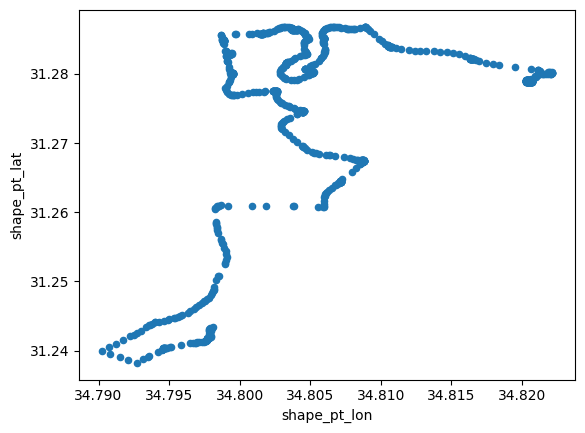

In [20]:
trip.plot.scatter(x='shape_pt_lon', y='shape_pt_lat');

In [ ]:
base = trip.plot.scatter(x='shape_pt_lon', y='shape_pt_lat');
fig = base.get_figure()
glue('exercise-06-f2', fig, display=False)

### Exercise 06-g

In [67]:
import pandas as pd
# Get total distance traveled per 'trip_id'
stop_times = pd.read_csv("data/gtfs/stop_times.txt")
stop_times = stop_times[["trip_id", "shape_dist_traveled"]].groupby("trip_id").max()
stop_times = stop_times.reset_index()
stop_times

,trip_id,shape_dist_traveled
0,10021427_240421,49074
1,10021428_240421,49074
2,10021429_240421,49074
3,10021430_240421,49074
4,10033656_180421,2874
...,...,...
287659,9957863_180421,33468
287660,9967071_180421,22341
287661,9967462_180421,39061
287662,9967467_180421,39061


In [68]:
glue('exercise-06-g1', stop_times)

,trip_id,shape_dist_traveled
0,10021427_240421,49074
1,10021428_240421,49074
2,10021429_240421,49074
3,10021430_240421,49074
4,10033656_180421,2874
...,...,...
287659,9957863_180421,33468
287660,9967071_180421,22341
287661,9967462_180421,39061
287662,9967467_180421,39061


In [69]:
# Join with trips to get 'route_id' per trip
trips = pd.read_csv("data/gtfs/trips.txt")
trips = trips[["trip_id", "route_id"]]
trips = pd.merge(trips, stop_times, on="trip_id")
trips = trips.groupby("route_id").first()
trips = trips.reset_index()
trips

,route_id,trip_id,shape_dist_traveled
0,1,28876224_180421,7072
1,2,25448344_180421,6870
2,3,56334623_180421,9855
3,5,56335137_180421,9751
4,7,37173391_180421,7794
...,...,...,...
7245,29363,56622661_230421,33173
7246,29364,56460152_180421,4300
7247,29365,56458677_180421,16100
7248,29366,56458667_180421,54800


In [22]:
glue('exercise-06-g2', trips)

NameError: name 'glue' is not defined

In [71]:
# Join with routes to get route short/long names
routes = pd.read_csv("data/gtfs/routes.txt")
routes = routes[["route_id", "route_short_name", "route_long_name"]]
routes = pd.merge(routes, trips, on="route_id")
routes

,route_id,route_short_name,route_long_name,trip_id,shape_dist_traveled
0,1,1,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,28876224_180421,7072
1,2,1,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...,25448344_180421,6870
2,3,2,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,56334623_180421,9855
3,5,2,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...,56335137_180421,9751
4,7,3,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,37173391_180421,7794
...,...,...,...,...,...
7245,29363,450,מסוף האוניברסיטה-תל אביב יפו<->...,56622661_230421,33173
7246,29364,125,תל אביב ההגנה-תל אביב יפו<->הרצ...,56460152_180421,4300
7247,29365,69,רחובות-רחובות<->תל אביב מרכז-תל...,56458677_180421,16100
7248,29366,60,נתניה-נתניה<->אשקלון-אשקלון,56458667_180421,54800


In [72]:
glue('exercise-06-g3', routes)

,route_id,route_short_name,route_long_name,trip_id,shape_dist_traveled
0,1,1,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,28876224_180421,7072
1,2,1,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...,25448344_180421,6870
2,3,2,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,56334623_180421,9855
3,5,2,ת. רכבת יבנה מזרח-יבנה<->ת. רכב...,56335137_180421,9751
4,7,3,ת. רכבת יבנה מערב-יבנה<->ת. רכב...,37173391_180421,7794
...,...,...,...,...,...
7245,29363,450,מסוף האוניברסיטה-תל אביב יפו<->...,56622661_230421,33173
7246,29364,125,תל אביב ההגנה-תל אביב יפו<->הרצ...,56460152_180421,4300
7247,29365,69,רחובות-רחובות<->תל אביב מרכז-תל...,56458677_180421,16100
7248,29366,60,נתניה-נתניה<->אשקלון-אשקלון,56458667_180421,54800


In [73]:
# Sort accordinge to distance traveled
routes = routes.sort_values('shape_dist_traveled', ascending=False).head()
routes

,route_id,route_short_name,route_long_name,trip_id,shape_dist_traveled
5856,19964,991,ת. מרכזית חוף הכרמל/רציפים בינע...,30526419_230421,446174
1668,7295,990,ת. מרכזית אילת/רציפים-אילת<->ת....,56505849_180421,445508
6199,21726,991,ת. מרכזית אילת/רציפים-אילת<->ת....,56505908_180421,445472
1669,7297,990,ת. מרכזית חוף הכרמל/רציפים בינע...,30526431_230421,443968
1671,7307,993,ת. מרכזית המפרץ/רציפים בינעירונ...,56505854_180421,432200


In [74]:
glue("exercise-06-g4", routes)

,route_id,route_short_name,route_long_name,trip_id,shape_dist_traveled
5856,19964,991,ת. מרכזית חוף הכרמל/רציפים בינע...,30526419_230421,446174
1668,7295,990,ת. מרכזית אילת/רציפים-אילת<->ת....,56505849_180421,445508
6199,21726,991,ת. מרכזית אילת/רציפים-אילת<->ת....,56505908_180421,445472
1669,7297,990,ת. מרכזית חוף הכרמל/רציפים בינע...,30526431_230421,443968
1671,7307,993,ת. מרכזית המפרץ/רציפים בינעירונ...,56505854_180421,432200


In [75]:
routes.head()["route_long_name"].to_list()

['ת. מרכזית חוף הכרמל/רציפים בינעירוני-חיפה<->ת. מרכזית אילת/הורדה-אילת-2#',
 'ת. מרכזית אילת/רציפים-אילת<->ת. מרכזית חוף הכרמל/הורדה-חיפה-1#',
 'ת. מרכזית אילת/רציפים-אילת<->ת. מרכזית חוף הכרמל/הורדה-חיפה-1#',
 'ת. מרכזית חוף הכרמל/רציפים בינעירוני-חיפה<->ת. מרכזית אילת/הורדה-אילת-2#',
 'ת. מרכזית המפרץ/רציפים בינעירוני-חיפה<->ת. מרכזית אילת/הורדה-אילת-2#']